# Create an Anomaly Detection Workflow

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy as np
import ontime as on
from IPython.display import Image

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


## Prerequisite

Install Prefect within your project

In [3]:
!pip install prefect

---
## Generation of random time series

In [4]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

## Create a Prefect Flow and Tasks

In [5]:
from prefect import task, flow, get_run_logger
from ontime.context import common

@task
def task_detect(ts):
    det = on.detectors.quantile(low_quantile=0.1, high_quantile=0.9)
    return det.fit_detect(ts)

@task
def task_predict(ts):
    model = common.GenericPredictor()
    model.fit(ts)
    return model.predict(48)

@flow
def detection_flow(ts, log_prints=True):
    ts_ano = task_detect(ts)
    ts_pred = task_predict(ts)
    ts_pred_ano = task_detect(ts_pred)
    return ts_ano, ts_pred, ts_pred_ano

## Display the graph

/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-P4y4iRhi-py3.10/lib/python3.10/site-packages/prefect/flows.py:1301: UserWarning: `flow.visualize()` will execute code inside of your flow that is not decorated with `@task` or `@flow`.
  warnings.warn(


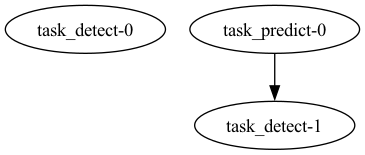

In [6]:
res = await detection_flow.visualize(ts)
Image(filename=f'./{detection_flow.name}.png')

## Run the flow

In [7]:
ts_ano, ts_pred, ts_pred_ano = detection_flow(ts)

14:33:46.487 | INFO    | prefect.engine - Created flow run 'vengeful-corgi' for flow 'detection-flow'

14:33:46.522 | INFO    | Flow run 'vengeful-corgi' - Created task run 'task_detect-0' for task 'task_detect'

14:33:46.523 | INFO    | Flow run 'vengeful-corgi' - Executing 'task_detect-0' immediately...

14:33:46.566 | INFO    | Task run 'task_detect-0' - Finished in state Completed()

14:33:46.579 | INFO    | Flow run 'vengeful-corgi' - Created task run 'task_predict-0' for task 'task_predict'

14:33:46.580 | INFO    | Flow run 'vengeful-corgi' - Executing 'task_predict-0' immediately...

14:33:47.241 | INFO    | Task run 'task_predict-0' - Finished in state Completed()

14:33:47.252 | INFO    | Flow run 'vengeful-corgi' - Created task run 'task_detect-1' for task 'task_detect'

14:33:47.253 | INFO    | Flow run 'vengeful-corgi' - Executing 'task_detect-1' immediately...

14:33:47.283 | INFO    | Task run 'task_detect-1' - Finished in state Completed()

14:33:47.296 | INFO    | Flow run 'vengeful-corgi' - Finished in state Completed()

## Show results

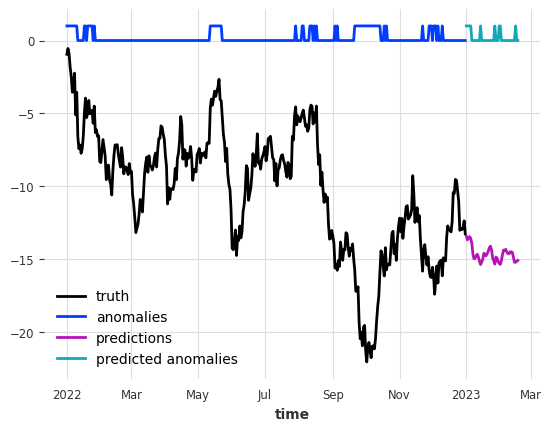

In [12]:
ts.plot(label='truth')
ts_ano.plot(label='anomalies')
ts_pred.plot(label='predictions')
ts_pred_ano.plot(label='predicted anomalies');